In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os

In [4]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)

print(bikesData.info())
print(bikesData.head())
print(bikesData.describe())
print(bikesData.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6 

In [5]:
columnsToDrop=['instant','casual','registered','atemp','dteday']
bikesData = bikesData.drop(columnsToDrop,1)

In [6]:
columnsToScale=['temp','hum','windspeed']
scaler = StandardScaler()
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])

bikesData['dayCount']=pd.Series(range(bikesData.shape[0]))/24
bikesData[columnsToScale].describe()

,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bikesData,test_size=0.3,random_state=42)

In [8]:
train_set.sort_values('dayCount',axis=0,inplace=True)
test_set.sort_values('dayCount',axis=0,inplace=True)
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor



In [11]:
cross_val_score
trainingCols = train_set.drop('cnt',axis=1)
trainingLabels = train_set['cnt']

In [12]:
dec_reg = DecisionTreeRegressor(random_state = 42)

In [13]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)


Scores: [42.79622021 50.31963846 37.03615448 44.15365653 47.07723911 72.03782895
 58.36019737 48.22615132 50.94407895 96.88898026]
Mean: 54.78401456342171
Standard deviation: 16.70953413912157


In [14]:
dt_mse_scores  = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 65.10279464  77.670527    60.59989749  73.66268699  75.76702279
 113.26870416  96.665763    81.28550338  86.87354694 149.4085296 ]
Mean: 88.03049759858746
Standard deviation: 25.035783082114


In [15]:
lin_reg = LinearRegression()

In [16]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942201
Standard deviation: 31.426965705295725


In [17]:
lr_mse_scores   = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.1902290118175
Standard deviation: 37.55565075919573


In [18]:
forest_reg = RandomForestRegressor(n_estimators=150,random_state=42)

In [19]:
rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [33.33921665 33.5634292  28.51544782 31.74855656 36.55779239 57.78830592
 40.91410636 40.72524123 37.58651864 84.75860197]
Mean: 42.54972167412677
Standard deviation: 15.998616999257116


In [20]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 45.56103408  50.97710002  43.43059587  52.22561489  60.45598311
  94.23444802  66.14917355  65.25550321  61.67555223 132.00386791]
Mean: 67.19688728966834
Standard deviation: 25.55764715717203


In [21]:
xgb_reg = XGBRegressor(n_estimator=150,random_state=42)

In [22]:
xg_mae_scores = -cross_val_score(xgb_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(xg_mae_scores)

Scores: [43.38296639 37.82926504 38.39412752 42.328369   40.2574145  44.48905646
 62.73727333 70.69106514 83.68985054 89.47947293]
Mean: 55.32788608471462
Standard deviation: 18.737342423733022


In [23]:
xg_mse_scores = np.sqrt(-cross_val_score(xgb_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))

display_scores(xg_mse_scores)


Scores: [ 59.25201601  55.00876454  52.48222778  60.37310447  57.68773166
  69.65030271  85.99209898  95.99290817 117.55403646 124.72397387]
Mean: 77.87171646600623
Standard deviation: 25.415269041514467


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = [{'n_estimators':[40,100,120,150],'max_features':[8,10,12],'max_depth':[15,28]}]

In [26]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

In [27]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [15, 28], 'max_feature

In [28]:
print(grid_search.best_params_)

{'max_depth': 28, 'max_features': 8, 'n_estimators': 150}


In [29]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.01033448 0.01500624 0.00739506 0.56851991 0.00196435 0.02475855
 0.06016899 0.01632601 0.10559629 0.04457023 0.01093427 0.13442562]


In [30]:
final_model = grid_search.best_estimator_

In [31]:
test_set.sort_values('dayCount',axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test_x_cols = test_set.drop('cnt',axis=1).columns.values
test_y_cols = 'cnt'

In [34]:
X_test=test_set.loc[:,test_x_cols]
y_test=test_set.loc[:,test_y_cols]

In [35]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)
test_set.describe()


39.26995881913146


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.012980,-0.002944,0.012217,185.322785,360.850898,187.069611
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.993567,0.995428,1.006002,177.755171,207.769276,169.991119
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477205,-3.251166,-1.553889,1.000000,0.000000,1.526667
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.815304,-0.763143,-0.699689,41.000000,180.781250,49.811667
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.015647,0.014364,0.031899,136.000000,362.375000,146.090000
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.742729,0.791871,0.519896,277.000000,537.104167,276.991667
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.404630,1.932215,5.399871,977.000000,724.041667,910.626667


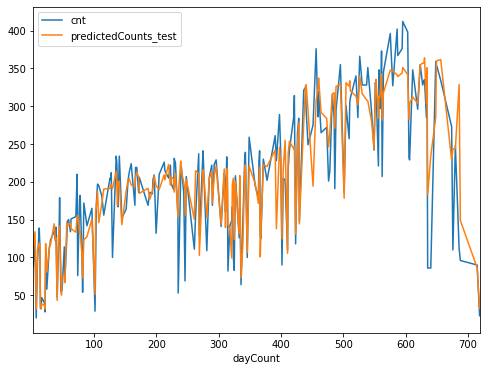

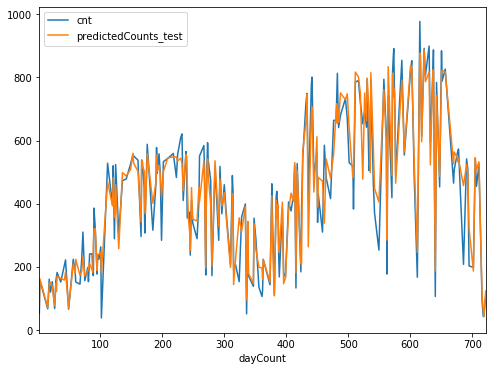

In [38]:
times = [9,18]
for time in times:
      fig = plt.figure(figsize=(8, 6))
      fig.clf()
      ax = fig.gca()
      test_set_freg_time = test_set[test_set.hr == time]
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
      test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
      plt.show()